# ML Assignment: Submitted by Shubham Murari

In [1]:
import os
from fnmatch import fnmatch
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

### Part 1: Reading the Dataset 'energydata_complete.csv' and Split the data to Train and Test

In [2]:
df_Energy=pd.read_csv('energydata_complete.csv')
df_Energy.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [3]:
print('Shape of dataframe is', df_Energy.shape)

Shape of dataframe is (19735, 29)


In [4]:
df_Energy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
date           19735 non-null object
Appliances     19735 non-null int64
lights         19735 non-null int64
T1             19735 non-null float64
RH_1           19735 non-null float64
T2             19735 non-null float64
RH_2           19735 non-null float64
T3             19735 non-null float64
RH_3           19735 non-null float64
T4             19735 non-null float64
RH_4           19735 non-null float64
T5             19735 non-null float64
RH_5           19735 non-null float64
T6             19735 non-null float64
RH_6           19735 non-null float64
T7             19735 non-null float64
RH_7           19735 non-null float64
T8             19735 non-null float64
RH_8           19735 non-null float64
T9             19735 non-null float64
RH_9           19735 non-null float64
T_out          19735 non-null float64
Press_mm_hg    19735 non-null float64
RH_out         19735 n

#### Checking for the Missing Values:

In [5]:
df_Energy.isnull().sum()

date           0
Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
dtype: int64

#### Checking the statistics of different variables: 

In [6]:
df_Energy.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,...,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,...,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,...,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,...,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,...,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,...,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,...,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


### Feature Selection:

#### Analyze the Correlation between different Variables (Plot a Heat Map)

Text(0.5,1,'Heatmap of Variables')

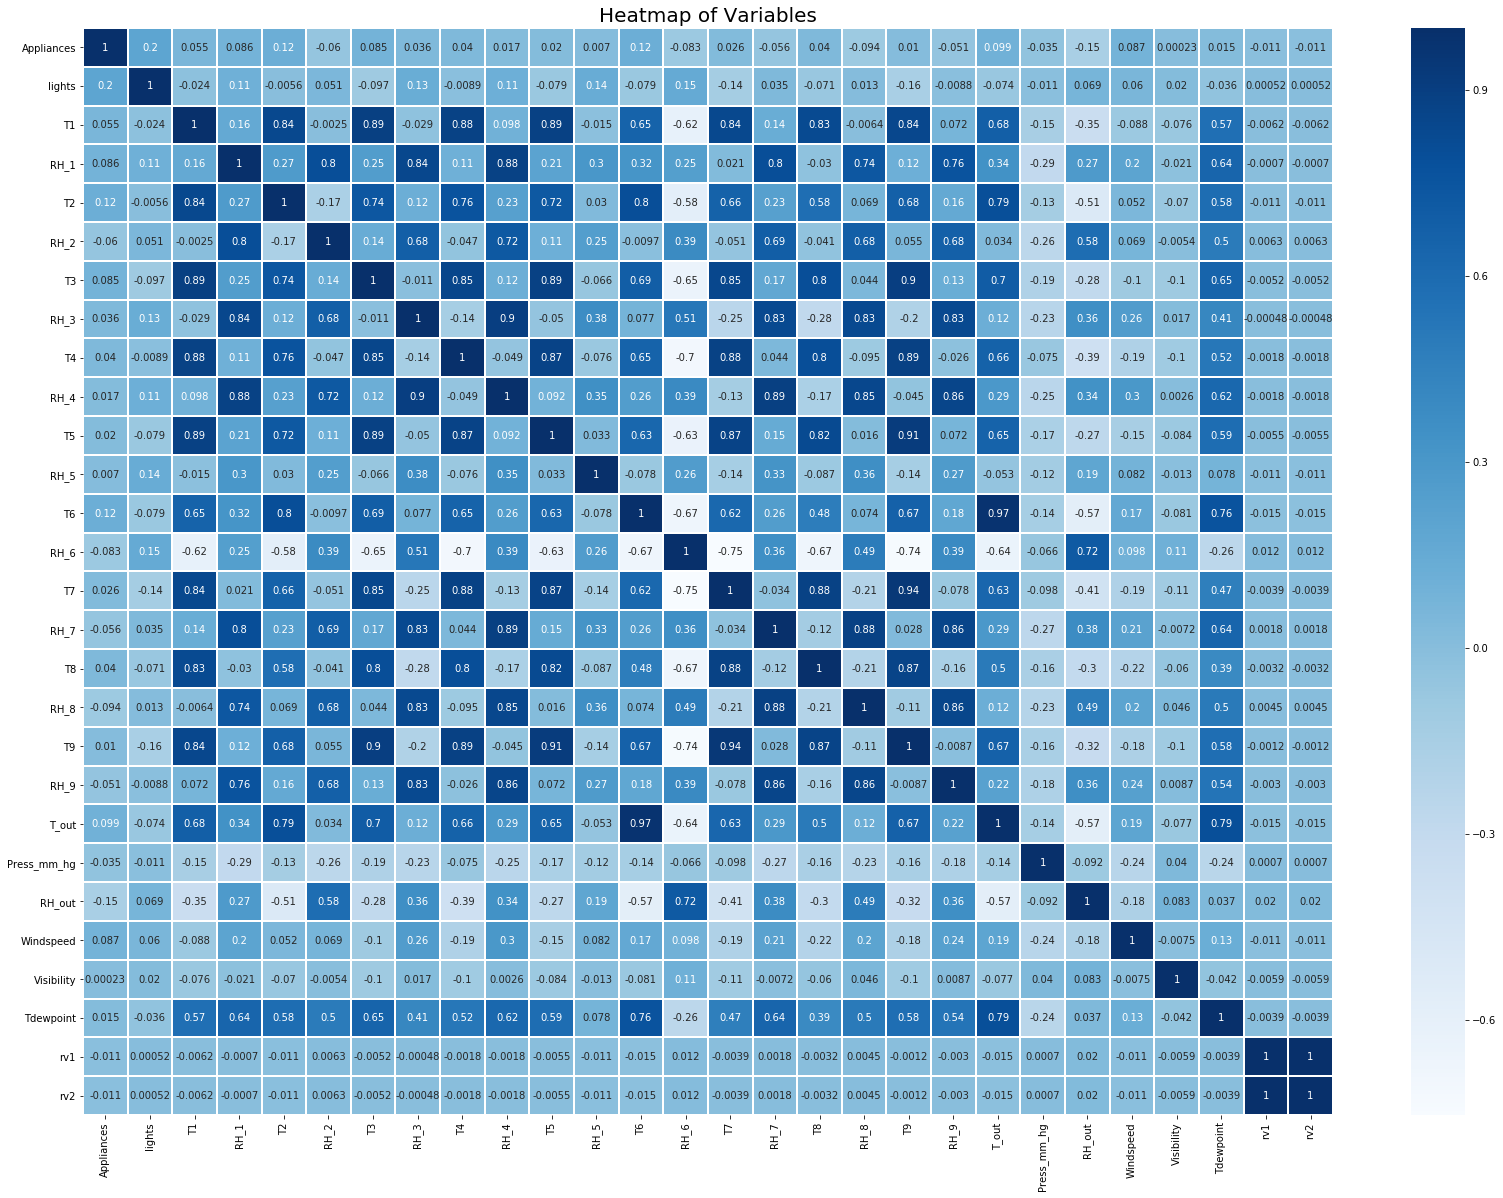

In [7]:
#Correlation:

fig = plt.figure(figsize=(28,20))

axis = sns.heatmap(df_Energy.corr(), cmap= 'Blues', linewidth=1, linecolor='white', annot=True)
axis.set_title('Heatmap of Variables', fontsize=20)

#### Further drill down the Correlation Matrix:

In [8]:
corr_matrix = df_Energy.corr().abs()

#the matrix is symmetric so we need to extract upper triangle matrix without diagonal (k = 1)

sol = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
                 .stack()
                 .sort_values(ascending=False))
sol = sol.to_frame()
sol.columns=['corr']
sol[sol['corr'] >  0.8]

,,corr
rv1,rv2,1.000000
T6,T_out,0.974787
T7,T9,0.944776
T5,T9,0.911055
T3,T9,0.901324
RH_3,RH_4,0.898978
RH_4,RH_7,0.894301
T1,T3,0.892402
T4,T9,0.889439
T3,T5,0.888169


In [9]:
#dropping these because of high correlation, and will run the belwo code again
df = df_Energy.drop(columns=['rv2','T9','RH_3','T1','RH_4','T3','T4','RH_7','RH_9','T7'],axis=1)

corr_matrix = df.corr().abs()

#the matrix is symmetric so we need to extract upper triangle matrix without diagonal (k = 1)
sol = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
                 .stack()
                 .sort_values(ascending=False))
sol = sol.to_frame()
sol.columns=['corr']
sol[sol['corr'] >  0.8]

,,corr
T6,T_out,0.974787
T5,T8,0.824981
T2,T6,0.801186


In [10]:
#dropping these because of high correlation, and will run the belwo code again
df = df.drop(columns=['T6'],axis=1)

corr_matrix = df.corr().abs()

#the matrix is symmetric so we need to extract upper triangle matrix without diagonal (k = 1)
sol = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
                 .stack()
                 .sort_values(ascending=False))
sol = sol.to_frame()
sol.columns=['corr']
sol[sol['corr'] >  0.8]

,,corr
T5,T8,0.824981


In [11]:
# We can also remove the Date Column: 

df = df.drop(columns=['date'],axis=1)

#### So finally removing the highly correlated features, we will left with the following variables:

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 17 columns):
Appliances     19735 non-null int64
lights         19735 non-null int64
RH_1           19735 non-null float64
T2             19735 non-null float64
RH_2           19735 non-null float64
T5             19735 non-null float64
RH_5           19735 non-null float64
RH_6           19735 non-null float64
T8             19735 non-null float64
RH_8           19735 non-null float64
T_out          19735 non-null float64
Press_mm_hg    19735 non-null float64
RH_out         19735 non-null float64
Windspeed      19735 non-null float64
Visibility     19735 non-null float64
Tdewpoint      19735 non-null float64
rv1            19735 non-null float64
dtypes: float64(15), int64(2)
memory usage: 2.6 MB


In [729]:
df.columns

Index(['Appliances', 'lights', 'RH_1', 'T2', 'RH_2', 'T5', 'RH_5', 'RH_6',
       'T8', 'RH_8', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'rv1'],
      dtype='object')

### Following plots will give an overview of all the variables and showcase how they are distributed:

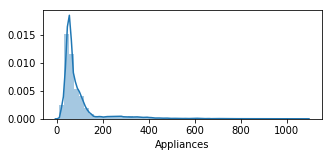

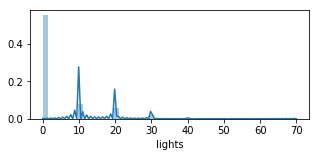

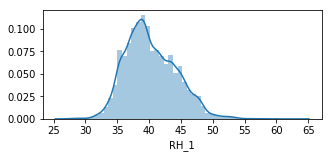

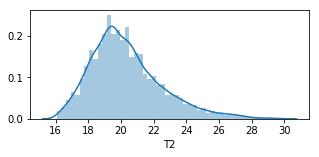

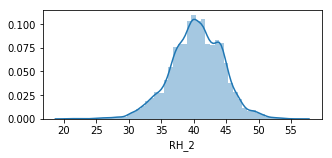

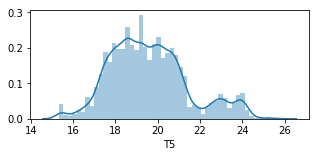

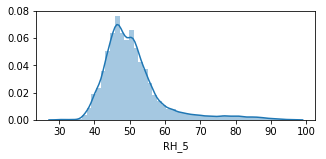

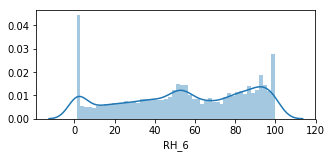

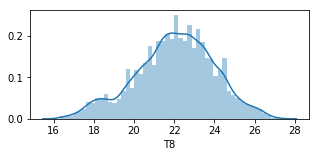

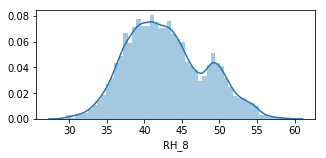

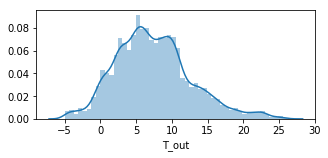

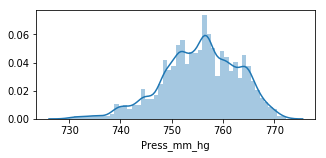

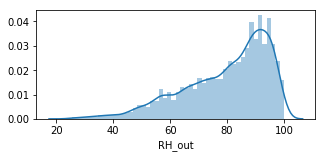

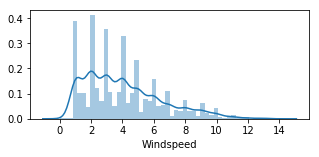

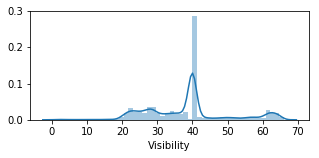

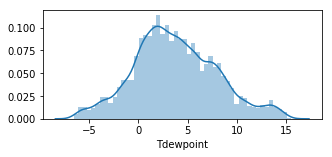

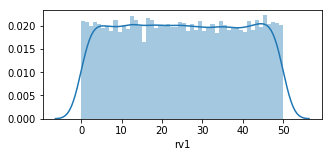

In [15]:
for i in df.columns:
    fig = plt.figure(figsize = (5,2))
    sns.distplot(df[i], kde = True, bins = 50)

#### As we can see that most of our variables are almost normally distributed, but few variables like 'Light', 'Visibility' and 'Windspeed' have few spikes i.e. outliers, we will look into these variables in our Experiment 4

### Partitioning dataset using 70/30 split rule 

In [13]:
xTrain, xTest, yTrain, yTest = train_test_split(df.iloc[:,1:29],df.iloc[:,0], test_size = 0.3, random_state = 0)

In [14]:
print('Shape of xTrain Set', xTrain.shape)
print('Shape of yTrain Set', yTrain.shape)

print('')

print('Shape of xTest Set', xTest.shape)
print('Shape of yTest Set', yTest.shape)

Shape of xTrain Set (13814, 16)
Shape of yTrain Set (13814,)

Shape of xTest Set (5921, 16)
Shape of yTest Set (5921,)


In [15]:
xTrain.head()

,lights,RH_1,T2,RH_2,T5,RH_5,RH_6,T8,RH_8,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1
3766,20,44.560000,22.323333,43.526667,19.100000,56.982222,67.960000,21.487222,49.487778,11.600000,744.166667,63.333333,9.000000,40.0,4.833333,1.257935
9503,10,31.700000,21.000000,31.826667,18.666667,39.700000,14.700000,23.790000,32.663333,10.116667,764.533333,49.000000,4.833333,25.5,-0.166667,14.358423
10946,0,36.230000,21.356667,36.400000,20.100000,46.223333,20.763333,24.100000,36.530000,12.300000,750.100000,55.333333,9.666667,40.0,3.433333,22.111894
10393,20,39.163333,20.790000,40.663333,20.790000,43.830000,43.766667,23.790000,39.000000,7.333333,756.633333,81.500000,2.000000,40.0,4.400000,30.049301
15274,0,41.360000,19.760000,40.830000,19.500000,44.090000,23.690000,22.390000,37.590000,6.700000,748.766667,58.666667,6.666667,40.0,-0.900000,22.500115


In [16]:
yTrain.head()

3766     100
9503      90
10946     60
10393     90
15274     70
Name: Appliances, dtype: int64

### Converting the dataframes to the Arrays so that we can further Normalize it

In [17]:
xTrain_matrix=np.array(xTrain)
xTest_matrix=np.array(xTest)
yTrain_vector=np.array(yTrain)
yTest_vector=np.array(yTest)

In [18]:
yTrain_vector.shape

(13814,)

In [19]:
yTest_vector.shape

(5921,)

In [20]:
xTrain_matrix.shape

(13814, 16)

In [21]:
xTest_matrix.shape

(5921, 16)

### Due to varying magnitude of features, we need to perform Feature Normalisation. The method below subtracts the mean and divides the value by standard deviation to scale the values

In [22]:
def normaliseData(X):
    scaler=preprocessing.StandardScaler().fit(X)
    Xnorm=scaler.transform(X)
    return Xnorm

#### Normalising "xTrain" using Standard Scaler

In [23]:
xTrain_matrix=normaliseData(xTrain_matrix)
xTrain_matrix

array([[ 2.04008149,  1.07991298,  0.9157877 , ...,  0.14084505,
         0.25719503, -1.63268062],
       [ 0.77909954, -2.1532799 ,  0.30833191, ..., -1.08682643,
        -0.93964992, -0.73065121],
       [-0.48188242, -1.01437137,  0.47205425, ...,  0.14084505,
        -0.07792155, -0.19678882],
       ...,
       [-0.48188242, -1.04956942, -0.60973728, ..., -1.29849392,
        -0.38511176,  0.34334949],
       [-0.48188242,  0.41114991,  0.21193465, ...,  0.14084505,
         1.10296546,  0.95693127],
       [-0.48188242,  0.87878123,  0.12471808, ...,  0.14084505,
        -0.12579535, -1.26203846]])

#### Normalising "xTest" using Standard Scaler

In [24]:
xTest_matrix=normaliseData(xTest_matrix)
xTest_matrix

array([[-0.47256809, -1.74692654, -0.24619744, ...,  0.14310903,
        -1.51916792,  1.17696559],
       [-0.47256809, -0.43891687, -0.39145471, ...,  0.14310903,
        -0.22793629, -0.0281233 ],
       [-0.47256809,  0.28663936, -0.07698021, ...,  0.14310903,
         0.16179521, -1.47573768],
       ...,
       [-0.47256809, -1.14187792, -1.159671  , ...,  1.66010499,
        -0.94441238, -1.27097744],
       [-0.47256809,  0.43978445, -0.07698021, ..., -0.32474954,
        -0.47594724, -1.61447479],
       [-0.47256809, -1.48666358, -0.26117242, ...,  0.14310903,
        -1.88134265,  1.23198812]])

### Part 3: Implementation of Gradient Descent:


#### Add column of ones for bias initialisation

In [25]:
XtrainNorm=np.hstack((np.ones((xTrain_matrix.shape[0],1)),xTrain_matrix))
XtestNorm=np.hstack((np.ones((xTest_matrix.shape[0],1)),xTest_matrix))

#### Normalized Value for xTrain:

In [26]:
XtrainNorm

array([[ 1.        ,  2.04008149,  1.07991298, ...,  0.14084505,
         0.25719503, -1.63268062],
       [ 1.        ,  0.77909954, -2.1532799 , ..., -1.08682643,
        -0.93964992, -0.73065121],
       [ 1.        , -0.48188242, -1.01437137, ...,  0.14084505,
        -0.07792155, -0.19678882],
       ...,
       [ 1.        , -0.48188242, -1.04956942, ..., -1.29849392,
        -0.38511176,  0.34334949],
       [ 1.        , -0.48188242,  0.41114991, ...,  0.14084505,
         1.10296546,  0.95693127],
       [ 1.        , -0.48188242,  0.87878123, ...,  0.14084505,
        -0.12579535, -1.26203846]])

In [27]:
XtrainNorm.shape

(13814, 17)

#### Normalized Value for xTest:

In [28]:
XtestNorm

array([[ 1.        , -0.47256809, -1.74692654, ...,  0.14310903,
        -1.51916792,  1.17696559],
       [ 1.        , -0.47256809, -0.43891687, ...,  0.14310903,
        -0.22793629, -0.0281233 ],
       [ 1.        , -0.47256809,  0.28663936, ...,  0.14310903,
         0.16179521, -1.47573768],
       ...,
       [ 1.        , -0.47256809, -1.14187792, ...,  1.66010499,
        -0.94441238, -1.27097744],
       [ 1.        , -0.47256809,  0.43978445, ..., -0.32474954,
        -0.47594724, -1.61447479],
       [ 1.        , -0.47256809, -1.48666358, ...,  0.14310903,
        -1.88134265,  1.23198812]])

In [29]:
XtestNorm.shape

(5921, 17)

#### Transforming the X values into Matrix and transposing the Y matrix for Test and Train

In [30]:
# For TRAIN:

XtrainMatrix= np.matrix(XtrainNorm) 
yTrain = np.matrix(yTrain_vector).T

In [31]:
#For TEST:

XtestMatrix = np.matrix(XtestNorm)  
yTest = np.matrix(yTest_vector).T

### Implementing Cost Function:

In [32]:
def computeCost(X,y,theta):
    error=np.power(((X * theta.T) - y), 2)
    return np.sum(error) / (2 * len(X))

### Implementing Gradient Descent for each Iteration:

In [33]:
def gradientDescent(Xtrain, ytrain,Xtest,ytest, theta, alpha, iters,threshold=0.001):
    temp=np.matrix(np.zeros(theta.shape))
    parameters=int(theta.shape[1])
    trainCost = np.zeros(iters)
    testCost=np.zeros(iters)
    for i in range(iters):
        error=(Xtrain * theta.T) - ytrain
        for j in range(parameters):
            term=np.multiply(error, Xtrain[:,j])
            temp[0,j]=theta[0,j] - ((alpha / len(Xtrain)) * np.sum(term))    
        theta=temp
        trainCost[i]=computeCost(Xtrain, ytrain, theta)
        testCost[i]=computeCost(Xtest,ytest,theta)
        
        if i!=0 and trainCost[i-1]-trainCost[i]<threshold:
            print('')
            print('Converged in ',str(i),' iterations.')
            break
        
    return theta,trainCost,testCost

### Implementing the function to plot the Learning Curve:

In [34]:
def plotLearningCurve(trainCost,testCost):
    size=trainCost.size-trainCost[trainCost==0].size-1
    fig, ax = plt.subplots(figsize=(10,8))
    ax.plot(list(range(0,size)), trainCost[0:size], 'r')
    ax.plot(list(range(0,size)), testCost[0:size], 'b')
    ax.set_xlabel('Iterations')
    ax.set_ylabel('Cost')
    ax.set_title('Training/Testing Cost VS Iterations')

## Experiment 1:

In [35]:
alpha=0.01
iterations=10000
theta=np.zeros((XtrainMatrix.shape[1],1)).T
theta,trainCost,testCost= gradientDescent(XtrainMatrix,yTrain,XtestMatrix,yTest,theta,alpha,iterations)
theta


Converged in  6022  iterations.


matrix([[ 96.93426958,  15.65705539,  57.8209511 , -10.33936145,
         -35.45614455,  -6.05238819,   0.74394679,  -1.30135727,
          11.18516956, -26.44991035,  -2.43413783,  -0.47734554,
          -2.10417688,   5.72450703,   1.62252111,   2.66237535,
          -1.1364462 ]])

In [36]:
computeCost(XtrainMatrix,yTrain,theta)

4453.244120178135

In [37]:
computeCost(XtestMatrix,yTest,theta)

4949.39836233902

### Plotting the Learning Curve

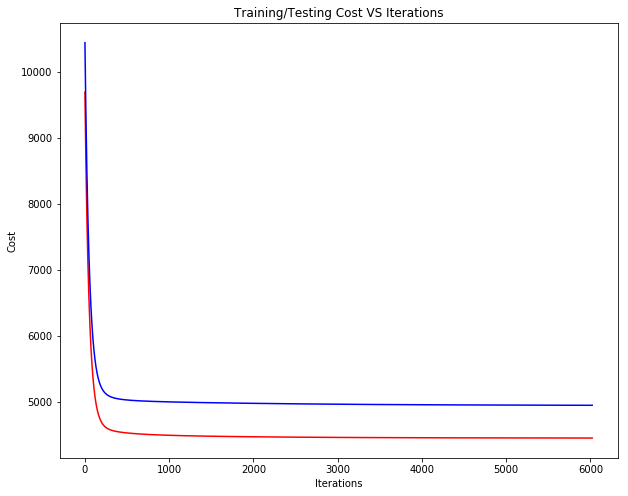

In [41]:
plotLearningCurve(trainCost,testCost)

#### We just tried for alpha = 0.01 with 10000 iterations it gives the 'Training Cost' = 4453.244 and 'Testing Cost' = 4949.398 Lets try other values of alpha and see if we can optimize our cost function 

### *alpha = 0.1* ( for this value we are getting Optimized value of Cost Function) - Explained Below

In [39]:
alpha=0.1
iterations=5000
theta=np.zeros((XtrainMatrix.shape[1],1)).T
theta,trainCost,testCost = gradientDescent(XtrainMatrix,yTrain,XtestMatrix,yTest,theta,alpha,iterations)
theta


Converged in  989  iterations.


matrix([[ 96.93426958,  15.62232199,  61.41517463, -13.87522583,
         -39.91347269,  -4.50714219,   0.66410548,  -0.99921118,
          11.86424237, -26.32250765,  -3.29951467,  -0.3867976 ,
          -2.44574044,   5.75019674,   1.58037128,   4.24228449,
          -1.14275002]])

### So above are the best coefficeints for my Regression Model

In [40]:
computeCost(XtrainMatrix,yTrain,theta)

4451.761478098436

In [41]:
computeCost(XtestMatrix,yTest,theta)

4944.7679651899225

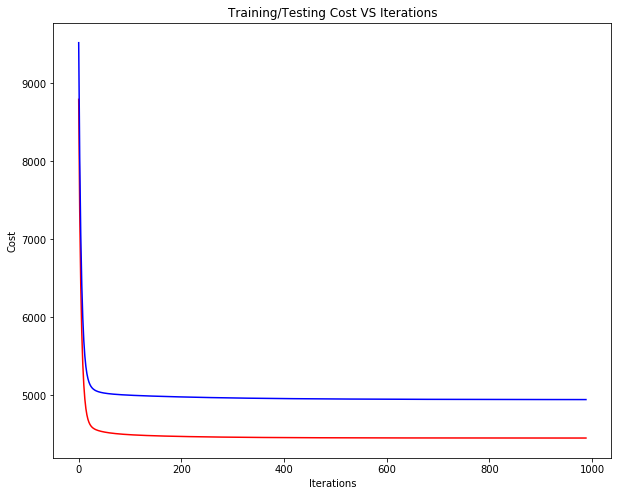

In [42]:
plotLearningCurve(trainCost,testCost)

#### Selecting the alpha value as 0.1 optimized the cost function a little bit. Now the new values are- 'Training Cost' = 4451.761 and 'Testing Cost' = 4944.767

### *********What if we decrease the value of alpha below 0.01, let's try it*************

### *alpha = 0.001*

In [44]:
alpha=0.001
iterations=40000
theta=np.zeros((XtrainMatrix.shape[1],1)).T
theta,trainCost,testCost = gradientDescent(XtrainMatrix,yTrain,XtestMatrix,yTest,theta,alpha,iterations)
theta


Converged in  24213  iterations.


matrix([[ 9.69342696e+01,  1.58187727e+01,  4.64797409e+01,
          3.70904188e-02, -2.18958098e+01, -9.76314237e+00,
          8.90777062e-01, -1.60804119e+00,  8.60886280e+00,
         -2.66776110e+01, -1.94606959e+00, -8.14394502e-01,
         -2.91759691e+00,  5.51123159e+00,  1.76612650e+00,
         -1.97854709e-01, -1.11267332e+00]])

#### First of all, for VERY SMALL value of alpha (e.g. 0.001), model takes time to get converged and it takes LOTS OF iterations which is not advisable and not efficient for the model

In [45]:
computeCost(XtrainMatrix,yTrain,theta)

4467.1262997730255

#### On the contrary both my Training and Testing costs get increased

In [46]:
computeCost(XtestMatrix,yTest,theta)

4972.513485199202

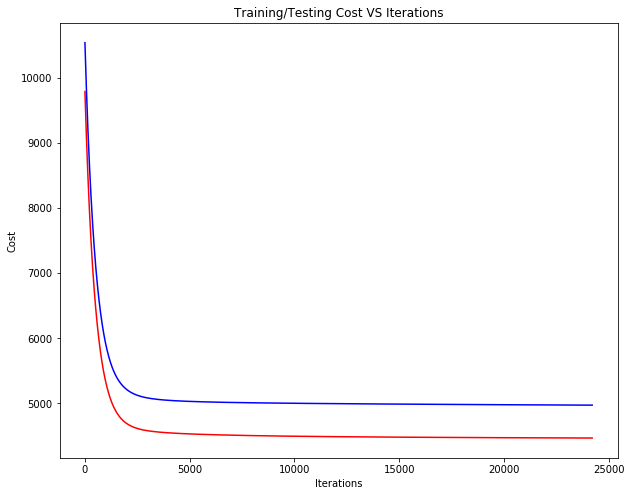

In [47]:
plotLearningCurve(trainCost,testCost)

### ******Similarly, what if I increase the value of my lerning rate alpha above 0.1? Lets say 0.5 !!******

### *alpha = 0.5*

In [48]:
alpha=0.5
iterations=100
theta=np.zeros((XtrainMatrix.shape[1],1)).T
theta,trainCost,testCost = gradientDescent(XtrainMatrix,yTrain,XtestMatrix,yTest,theta,alpha,iterations)
theta


Converged in  3  iterations.


matrix([[ 90.87587773,  18.65547342,  13.37336539,   1.52753329,
          -2.07641128,  -8.69426686,   1.29955178,   2.49893032,
          -3.93459184, -10.95792328,  -2.67903907,  -1.53998993,
          -4.86635557,   4.88490026,   1.97035853,  -5.7235454 ,
          -0.86453205]])

#### However, the model gets converged in 3 iterations. But have a look at my Training and Testing Cost !!

In [49]:
computeCost(XtrainMatrix,yTrain,theta)

4882.811453514792

#### There is a significant increase in both Training and Testing Cost of the function, which we do not want !!

In [51]:
computeCost(XtestMatrix,yTest,theta)

5357.399136932875

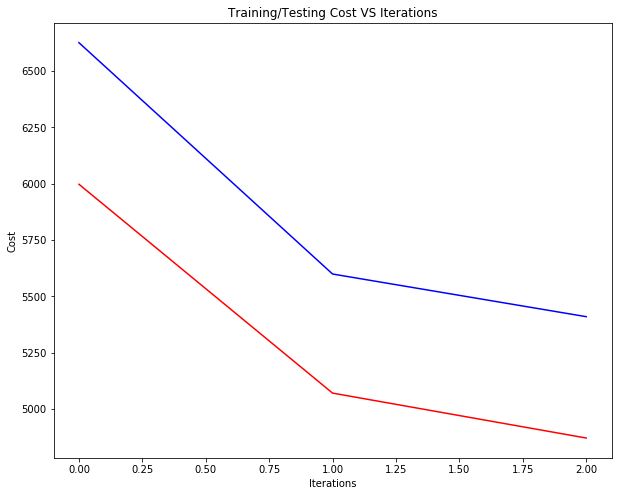

In [52]:
plotLearningCurve(trainCost,testCost)

### We can conclude that for the 16 features that we picked for our model, Optimized Value of Cost Function is for the learning rate, *alpha = 0.1*
### Train Cost: 4451.761
### Test Cost: 4944.767

## Experiment 2:

### As a part of this experiment we will be experimenting with different values of Convergence Criteria, in the below function I have passed an arrary of randomly picked values of convergence criteria.

### We will fix the learning rate as alpha = 0.1

In [56]:
convergence_criteria=[0.0001,0.001,0.01,0.1,0.5,1]
iterations=10000
alpha=0.1
for i in convergence_criteria:
    theta=np.zeros((XtrainMatrix.shape[1],1)).T
    print('*********************','Convergence Threshold', i , '*************************')
    print('')
    
    theta,trainCost,testCost= gradientDescent(XtrainMatrix,yTrain,XtestMatrix,yTest,theta,alpha,iterations,i)
    
    print('Coeffiecients',theta)
    print('')
    print('Train Cost',computeCost(XtrainMatrix,yTrain,theta))
    print('Test Cost',computeCost(XtestMatrix,yTest,theta))
    print('')

********************* Convergence Threshold 0.0001 *************************


Converged in  1758  iterations.
Coeffiecients [[ 96.93426958  15.60845554  62.71195777 -15.19735581 -41.63007353
   -3.87728765   0.62216858  -0.7899171   12.10043584 -26.25107502
   -5.06904357  -0.36289884  -3.48788718   5.72406875   1.5715171
    6.06240736  -1.14470551]]

Train Cost 4451.533466327426
Test Cost 4943.488346752735

********************* Convergence Threshold 0.001 *************************


Converged in  989  iterations.
Coeffiecients [[ 96.93426958  15.62232199  61.41517463 -13.87522583 -39.91347269
   -4.50714219   0.66410548  -0.99921118  11.86424237 -26.32250765
   -3.29951467  -0.3867976   -2.44574044   5.75019674   1.58037128
    4.24228449  -1.14275002]]

Train Cost 4451.761478098436
Test Cost 4944.7679651899225

********************* Convergence Threshold 0.01 *************************


Converged in  602  iterations.
Coeffiecients [[ 96.93426958  15.65680993  57.84649629 -10.36397

### Closely observe the results of Train and Test Cost Values for different combinations of Convergence Criteria and alpha (i.e. 0.1)

#### 1. For Convergence Criteria = 0.0001 and alpha = 0.1 -
#### Training Cost: 4451.5334
#### Test Cost: 4943.4883

#### and these values of Cost Function are slightly smaller in magnitude than the other values (which has Convergence Criteria of 0.001, 0.1, 0.5 and 1 respectively)

### So for my Experiment best combination for Convergence Criteria and Learning Rate is 0.0001 and 0.1 respectively. 

### Let's plot the following graphs:

####               1. Convergence Threshold vs Score (Train/Test)
####               2. Training/Testing Cost vs Iterations (for best result)


Converged in  1758  iterations.

Converged in  989  iterations.

Converged in  242  iterations.

Converged in  87  iterations.

Converged in  58  iterations.


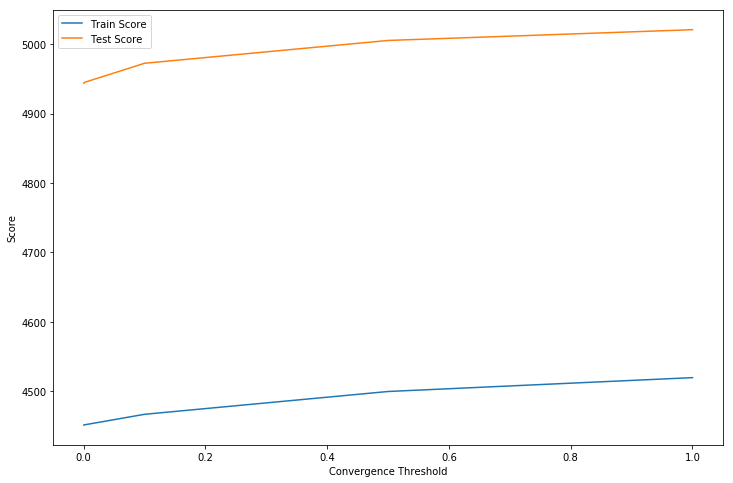

In [57]:
fig = plt.figure(figsize=(12,8))
convergence_criteria=[0.0001,0.001,0.1,0.5,1]
iterations=10000
alpha=0.1

train_score=[]
test_score=[]

for i in convergence_criteria:
    theta=np.zeros((XtrainMatrix.shape[1],1)).T
    theta,trainCost,testCost= gradientDescent(XtrainMatrix,yTrain,XtestMatrix,yTest,theta,alpha,iterations,i)
    train_score.append(computeCost(XtrainMatrix,yTrain,theta))
    test_score.append(computeCost(XtestMatrix,yTest,theta))
    

plt.plot(convergence_criteria,train_score,label='Train Score')
plt.plot(convergence_criteria,test_score,label='Test Score')
plt.legend()
plt.xlabel('Convergence Threshold')
plt.ylabel('Score')
plt.show()

### Plotting the Train/Test Cost vs Iteration for best combination i.e Convergence Criteria and Learning Rate is 0.0001 and 0.1 respectively.


In [58]:
alpha=0.1
convergence_criteria=0.0001
iterations=10000
theta=np.zeros((XtrainMatrix.shape[1],1)).T
theta,trainCost,testCost= gradientDescent(XtrainMatrix,yTrain,XtestMatrix,yTest,theta,alpha,iterations,convergence_criteria)
theta


Converged in  1758  iterations.


matrix([[ 96.93426958,  15.60845554,  62.71195777, -15.19735581,
         -41.63007353,  -3.87728765,   0.62216858,  -0.7899171 ,
          12.10043584, -26.25107502,  -5.06904357,  -0.36289884,
          -3.48788718,   5.72406875,   1.5715171 ,   6.06240736,
          -1.14470551]])

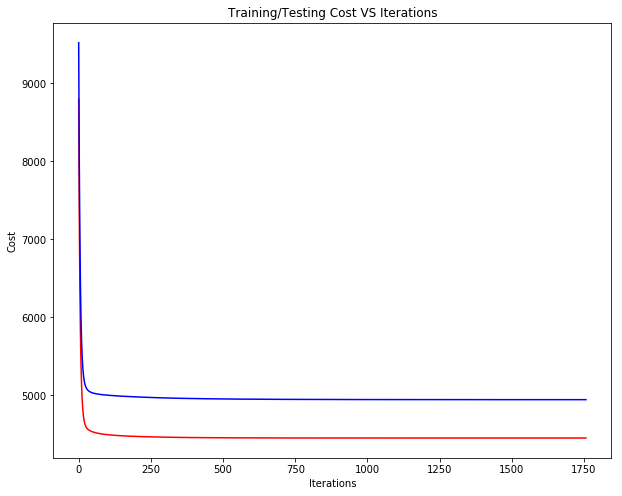

In [59]:
plotLearningCurve(trainCost,testCost)

In [60]:
computeCost(XtrainMatrix,yTrain,theta)

4451.533466327426

In [61]:
computeCost(XtestMatrix,yTest,theta)

4943.488346752735

### So for 16 features that we picked the best value for cost function is at learning rate, alpha = 0.1 and Convergence Criteria = 0.0001
### Train Cost: 4451.533
### Test Cost: 4943.488
#### this value is slighlty better than the value that we got when convergence criteria was 0.01, 0.1, 0.5, 1 respectively.  

## Experiment 3:

### Here we will pick the 10 random features and retrain the model again

In [62]:
df_Energy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
date           19735 non-null object
Appliances     19735 non-null int64
lights         19735 non-null int64
T1             19735 non-null float64
RH_1           19735 non-null float64
T2             19735 non-null float64
RH_2           19735 non-null float64
T3             19735 non-null float64
RH_3           19735 non-null float64
T4             19735 non-null float64
RH_4           19735 non-null float64
T5             19735 non-null float64
RH_5           19735 non-null float64
T6             19735 non-null float64
RH_6           19735 non-null float64
T7             19735 non-null float64
RH_7           19735 non-null float64
T8             19735 non-null float64
RH_8           19735 non-null float64
T9             19735 non-null float64
RH_9           19735 non-null float64
T_out          19735 non-null float64
Press_mm_hg    19735 non-null float64
RH_out         19735 n

### By using the following 'np.random' we will pick the 10 random features

In [133]:
df_exp3_cols = np.random.choice(df_Energy.columns,10,replace=False)

In [134]:
df_exp3_cols

array(['Press_mm_hg', 'RH_out', 'T9', 'lights', 'RH_5', 'T8', 'RH_7',
       'T2', 'RH_9', 'T7'], dtype=object)

### Finally we have the following dataset with 10 randomly selected features: 

In [135]:
df_exp3=df_Energy[['Press_mm_hg', 'RH_out', 'T9', 'lights', 'RH_5', 'T8', 'RH_7',
       'T2', 'RH_9', 'T7','Appliances']]
df_exp3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 11 columns):
Press_mm_hg    19735 non-null float64
RH_out         19735 non-null float64
T9             19735 non-null float64
lights         19735 non-null int64
RH_5           19735 non-null float64
T8             19735 non-null float64
RH_7           19735 non-null float64
T2             19735 non-null float64
RH_9           19735 non-null float64
T7             19735 non-null float64
Appliances     19735 non-null int64
dtypes: float64(9), int64(2)
memory usage: 1.7 MB


## Note: After selecting the 10 random feature for our model, we will follow the same steps to retrain our model as we did for Experiment 1.

In [136]:
df_exp3.head()

,Press_mm_hg,RH_out,T9,lights,RH_5,T8,RH_7,T2,RH_9,T7,Appliances
0,733.5,92.0,17.033333,30,55.20,18.2,41.626667,19.2,45.53,17.200000,60
1,733.6,92.0,17.066667,30,55.20,18.2,41.560000,19.2,45.56,17.200000,60
2,733.7,92.0,17.000000,30,55.09,18.2,41.433333,19.2,45.50,17.200000,50
3,733.8,92.0,17.000000,40,55.09,18.1,41.290000,19.2,45.40,17.133333,50
4,733.9,92.0,17.000000,40,55.09,18.1,41.230000,19.2,45.40,17.200000,60


### Partitioning the dataset:

In [137]:
x = df_exp3.drop(columns=["Appliances"], axis=1)
y = df_exp3['Appliances']

xTrain1, xTest1, yTrain1, yTest1 = train_test_split(x, y, test_size = 0.3, random_state = 0)

In [138]:
print('Shape of xTrain1 Set', xTrain1.shape)
print('Shape of yTrain1 Set', yTrain1.shape)

print('')

print('Shape of xTest1 Set', xTest1.shape)
print('Shape of yTest1 Set', yTest1.shape)

Shape of xTrain1 Set (13814, 10)
Shape of yTrain1 Set (13814,)

Shape of xTest1 Set (5921, 10)
Shape of yTest1 Set (5921,)


#### Vectorization of Dataframes: 

In [139]:
xTrain_matrix1 = np.array(xTrain1)
xTest_matrix1 = np.array(xTest1)
yTrain_vector1 = np.array(yTrain1)
yTest_vector1 = np.array(yTest1)

In [140]:
xTrain1.head()

,Press_mm_hg,RH_out,T9,lights,RH_5,T8,RH_7,T2,RH_9,T7
3766,744.166667,63.333333,18.700000,20,56.982222,21.487222,39.632778,22.323333,45.200000,18.70
9503,764.533333,49.000000,20.100000,10,39.700000,23.790000,23.730000,21.000000,36.863333,22.79
10946,750.100000,55.333333,20.390000,0,46.223333,24.100000,31.790000,21.356667,39.826667,21.89
10393,756.633333,81.500000,19.463333,20,43.830000,23.790000,35.230000,20.790000,37.590000,20.50
15274,748.766667,58.666667,19.390000,0,44.090000,22.390000,28.566667,19.760000,33.126667,20.10


#### Showcasing, how above values are getting stored in a matrix:

In [141]:
xTrain_matrix1

array([[744.16666667,  63.33333333,  18.7       , ...,  22.32333333,
         45.2       ,  18.7       ],
       [764.53333333,  49.        ,  20.1       , ...,  21.        ,
         36.86333333,  22.79      ],
       [750.1       ,  55.33333333,  20.39      , ...,  21.35666667,
         39.82666667,  21.89      ],
       ...,
       [762.3       ,  80.33333333,  19.39      , ...,  19.        ,
         39.09      ,  19.29      ],
       [752.05      ,  71.5       ,  20.        , ...,  20.79      ,
         42.23      ,  21.06666667],
       [752.43333333,  81.33333333,  16.35666667, ...,  20.6       ,
         46.65666667,  16.87888889]])

### Due to varying magnitude of features, we need to perform Feature Normalisation. The method below subtracts the mean and divides the value by standard deviation to scale the values

In [142]:
def normaliseData(X):
    scaler=preprocessing.StandardScaler().fit(X)
    Xnorm1=scaler.transform(X)
    return Xnorm1

#### Normalising "xTrain_matrix1" using Standard Scaler

In [143]:
xTrain_matrix1 = normaliseData(xTrain_matrix1)
xTrain_matrix1

array([[-1.53224702, -1.11443746, -0.38627799, ...,  0.9157877 ,
         0.88006858, -0.73870064],
       [ 1.21503554, -2.08035676,  0.30996359, ...,  0.30833191,
        -1.13222559,  1.20421318],
       [-0.73189302, -1.65355521,  0.45418505, ...,  0.47205425,
        -0.4169399 ,  0.77667713],
       ...,
       [ 0.9137787 ,  0.03118775, -0.04313036, ..., -0.60973728,
        -0.59475558, -0.45842701],
       [-0.46885533, -0.5640881 ,  0.26023204, ...,  0.21193465,
         0.1631737 ,  0.38556082],
       [-0.41714706,  0.09857747, -1.55165376, ...,  0.12471808,
         1.23167696, -1.60380136]])

#### Normalising "xTest_matrix1" using Standard Scaler

In [144]:
xTest_matrix1 = normaliseData(xTest_matrix1)
xTest_matrix1

array([[ 0.09071276, -2.50247733, -0.35436937, ..., -0.24619744,
        -2.95326278, -0.23823515],
       [-0.20568734, -0.2972224 ,  0.54012447, ..., -0.39145471,
        -0.29296496,  0.48470983],
       [ 0.12465171, -0.76265309,  0.12500026, ..., -0.07698021,
         0.12258171,  0.42655991],
       ...,
       [ 0.62468547,  0.56714887, -0.64594471, ..., -1.159671  ,
        -0.54149384, -0.66257243],
       [ 1.20617269,  0.79986422, -0.60146711, ..., -0.07698021,
         1.59457587, -0.84933322],
       [ 1.99355617, -1.32781893, -0.55204757, ..., -0.26117242,
        -0.42162461,  0.76917297]])

#### Initializing value for beta 0:

In [145]:
XtrainNorm1 = np.hstack((np.ones((xTrain_matrix1.shape[0],1)),xTrain_matrix1))
XtestNorm1 = np.hstack((np.ones((xTest_matrix1.shape[0],1)),xTest_matrix1))

#### Normalized Values:

In [146]:
XtrainNorm1

array([[ 1.        , -1.53224702, -1.11443746, ...,  0.9157877 ,
         0.88006858, -0.73870064],
       [ 1.        ,  1.21503554, -2.08035676, ...,  0.30833191,
        -1.13222559,  1.20421318],
       [ 1.        , -0.73189302, -1.65355521, ...,  0.47205425,
        -0.4169399 ,  0.77667713],
       ...,
       [ 1.        ,  0.9137787 ,  0.03118775, ..., -0.60973728,
        -0.59475558, -0.45842701],
       [ 1.        , -0.46885533, -0.5640881 , ...,  0.21193465,
         0.1631737 ,  0.38556082],
       [ 1.        , -0.41714706,  0.09857747, ...,  0.12471808,
         1.23167696, -1.60380136]])

#### Transforming the X values into Matrix and transposing the Y matrix for Test and Train

In [147]:
# For TRAIN:

XtrainMatrix1= np.matrix(XtrainNorm1) 
yTrain1 = np.matrix(yTrain_vector1).T

In [148]:
#For TEST:

XtestMatrix1 = np.matrix(XtestNorm1)  
yTest1 = np.matrix(yTest_vector1).T

In [149]:
yTest1

matrix([[290],
        [ 50],
        [260],
        ...,
        [ 50],
        [ 50],
        [ 60]], dtype=int64)

### Lets retrain the model now: 

### alpha = 0.01

In [150]:
alpha=0.01
iterations=10000
theta=np.zeros((XtrainMatrix1.shape[1],1)).T
theta,trainCost,testCost= gradientDescent(XtrainMatrix1,yTrain1,XtestMatrix1,yTest1,theta,alpha,iterations)
theta


Converged in  1409  iterations.


matrix([[ 96.93420165,  -5.15359307, -11.12748779,  -7.48460946,
          19.19349781,  -0.53368204,   3.73625767,  -8.06627357,
          14.34544075,   2.56799918,  -5.39176084]])

In [151]:
computeCost(XtrainMatrix1,yTrain1,theta)

4716.577049428068

In [152]:
computeCost(XtestMatrix1,yTest1,theta)

5179.717788161593

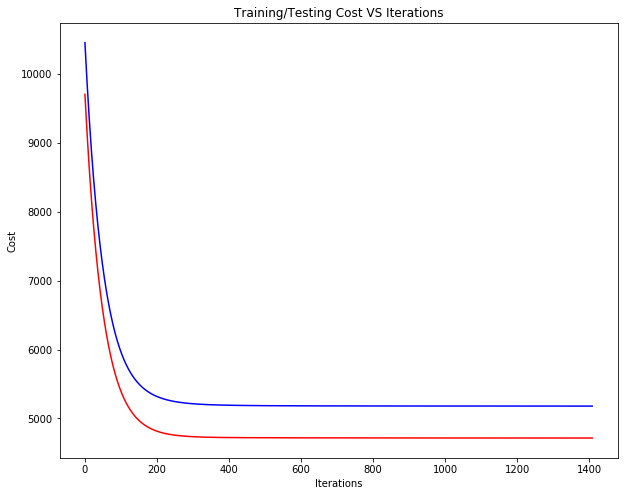

In [153]:
plotLearningCurve(trainCost,testCost)

### alpha = 0.1

#### At alpha = 0.1 we are getting the optimized value for cost function (when we pick 10 random variables) but again this value of cost function is still NOT better than the previous values that we got in Experiment 1 for 16 variables
#### (This we will explain in the report)

In [154]:
alpha=0.1
iterations=3000
theta=np.zeros((XtrainMatrix1.shape[1],1)).T
theta,trainCost,testCost= gradientDescent(XtrainMatrix1,yTrain1,XtestMatrix1,yTest1,theta,alpha,iterations)
theta


Converged in  235  iterations.


matrix([[ 96.93426958,  -5.18684694, -10.89297354,  -8.37043845,
          19.11654767,  -0.60573227,   4.49918335,  -8.94272701,
          14.83396074,   3.37665017,  -5.50920549]])

In [155]:
computeCost(XtrainMatrix1,yTrain1,theta)

4716.215292984913

In [156]:
computeCost(XtestMatrix1,yTest1,theta)

5179.216290873566

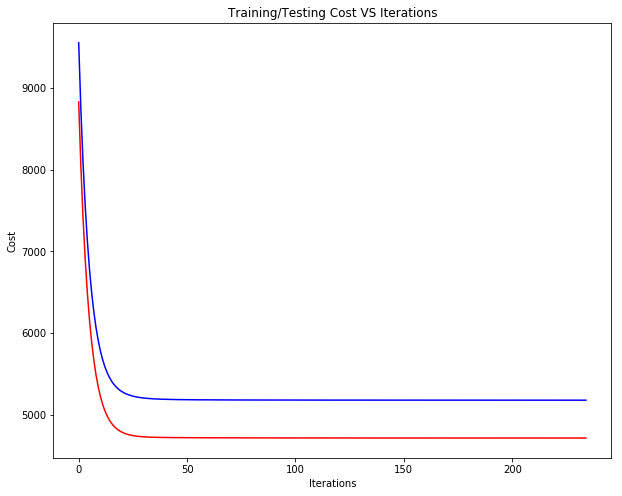

In [157]:
plotLearningCurve(trainCost,testCost)

### alpha = 0.5

#### at alpha = 0.5 the cost function value will start increasing 

In [158]:
alpha=0.5
iterations=1000
theta=np.zeros((XtrainMatrix1.shape[1],1)).T
theta,trainCost,testCost= gradientDescent(XtrainMatrix1,yTrain1,XtestMatrix1,yTest1,theta,alpha,iterations)
theta


Converged in  64  iterations.


matrix([[ 96.93426958,  -5.2053837 , -10.80952317,  -8.77558199,
          19.09215583,  -0.6281256 ,   4.69733169,  -9.20207774,
          14.97640154,   3.61782366,  -5.36877058]])

In [159]:
computeCost(XtrainMatrix1,yTrain1,theta)

4716.17263386053

In [160]:
computeCost(XtestMatrix1,yTest1,theta)

5179.1162260319215

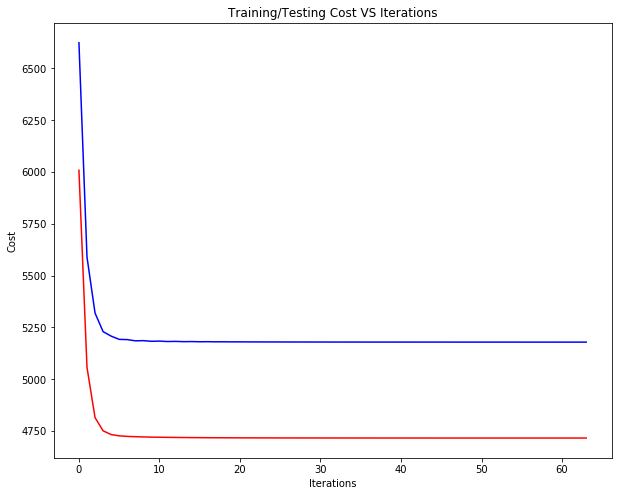

In [161]:
plotLearningCurve(trainCost,testCost)

### So for 10 randomly picked features the best value for cost function is at learning rate, alpha = 0.5
### Train Cost: 4716.172
### Test Cost: 5179.116
#### however, these values of Train and Test Cost are greater than what we got for 16 features !

### Experiment 4:

In [162]:
df_Energy.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [163]:
df_Energy.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,...,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,...,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,...,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,...,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,...,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,...,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,...,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


### When we closely observe the summary statistics of the Temperature (T) and Humidity (RH) for the areas/rooms inside the house which was monitored with a ZigBee wireless sensor network. 

### (e.g. 1. Kitchen Area, 2. Living Room, 3.Laundray Room, 4. Office, 5. Bathroom, 7. Ironing Room, 8. Teenager Room, 9. Parents Room
#### the mean values of Temperature and Humidity for these specific areas are almost same

Text(0.5,1,'Heatmap of Variables')

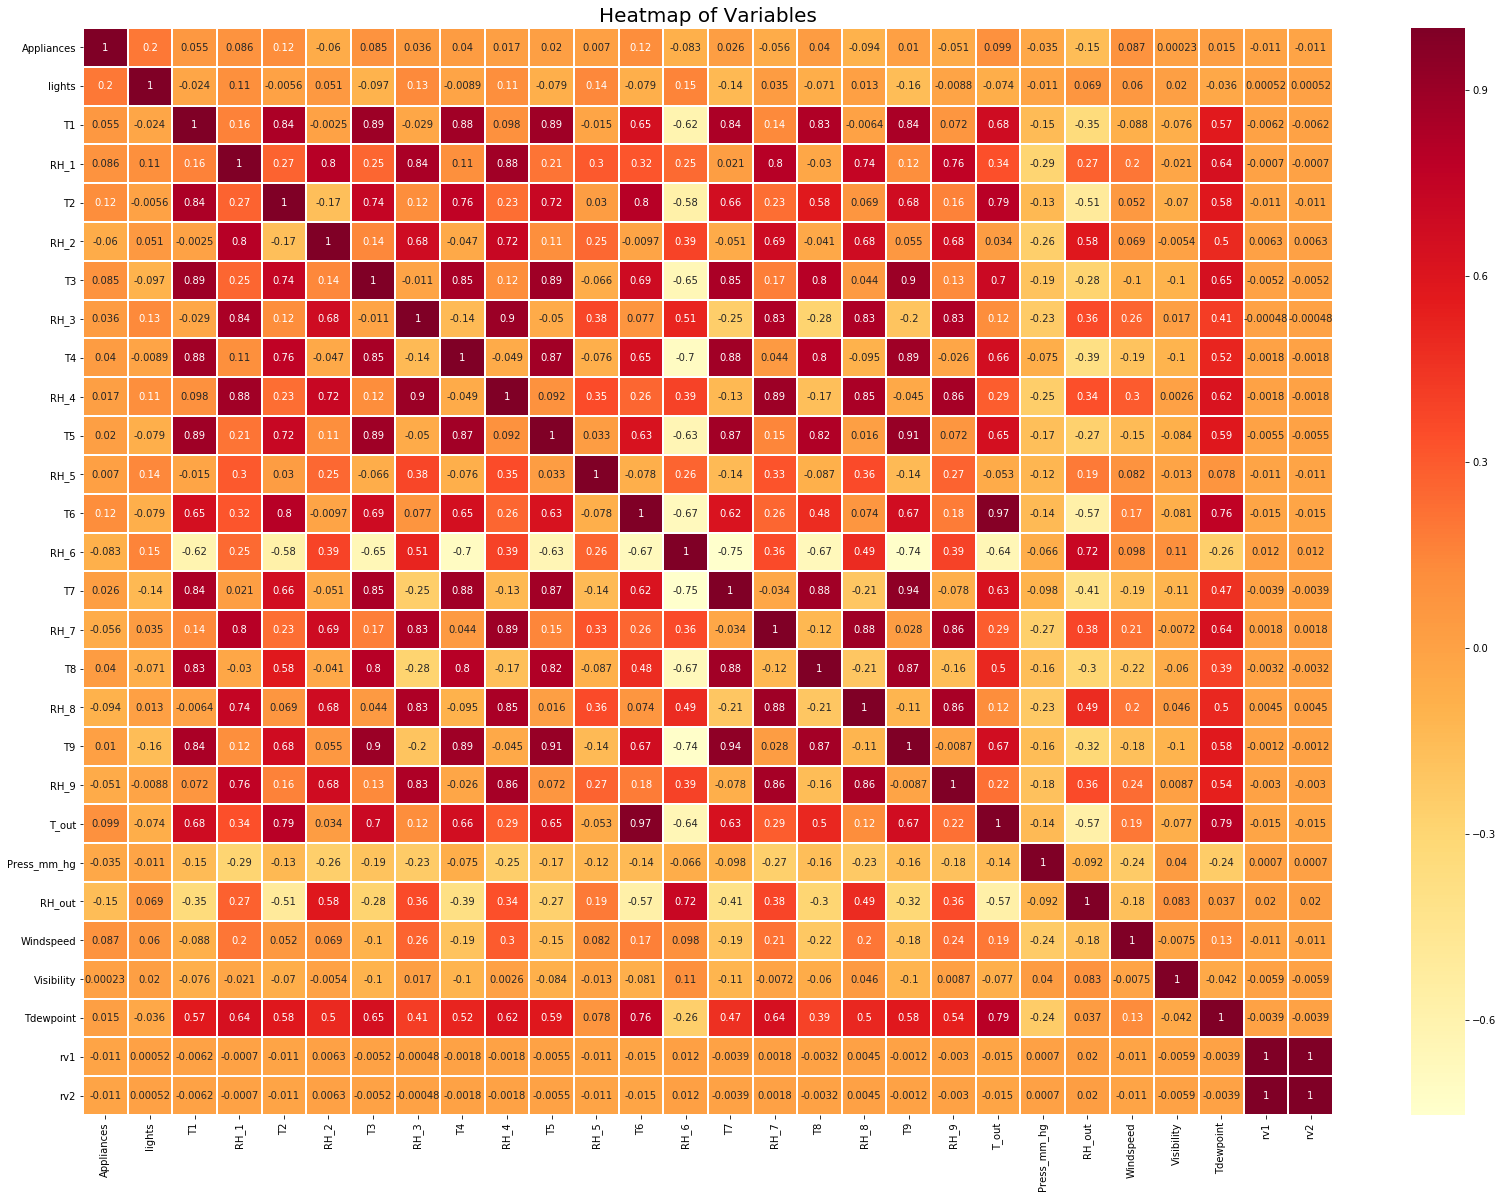

In [164]:
#Correlation:

fig = plt.figure(figsize=(28,20))

axis = sns.heatmap(df_Energy.corr(), cmap= 'YlOrRd', linewidth=1, linecolor='white', annot=True)
axis.set_title('Heatmap of Variables', fontsize=20)

### Observation 1: 

### From the above heat map we can observe that how various values of T1, T2, T3, T4, T5, T7, T8, T9 are highly correlated to each other which makes sense also because they are the temperature values of different rooms of same building/house

### Observation 2:

### With the same approach, we observed that Humidity values are also highly correlated but not all of them 

### Observation 3: 

### T6 which is the temperature of Northside of the Buidling is highly correlated with the Temperature outside (T_out) the weather station which is highly likely becuase after all they are the tempearture values of outside, so we can consider either one of them (not neccesarily though)

### Observation 4: 

### We will consider - Pressure, Windspeed, RH_out etc. because they are the important features from Chievres weather station which were merged together with the experimental data sets 

#### Below are are the features from actual dataset:

In [297]:
df_Energy.columns

Index(['date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')

### For the feature selection we are implementing the elimination using correlation backed up by the business logic which is explained in the report:

In [296]:
corr_matrix = df_Energy.corr().abs()

#the matrix is symmetric so we need to extract upper triangle matrix without diagonal (k = 1)

sol = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
                 .stack()
                 .sort_values(ascending=False))
sol = sol.to_frame()
sol.columns=['corr']
sol[sol['corr'] >  0.7]

,,corr
rv1,rv2,1.000000
T6,T_out,0.974787
T7,T9,0.944776
T5,T9,0.911055
T3,T9,0.901324
RH_3,RH_4,0.898978
RH_4,RH_7,0.894301
T1,T3,0.892402
T4,T9,0.889439
T3,T5,0.888169


In [346]:
df_Energy.columns

Index(['date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')

### Final 10 Features along with target variable 'Appliances' that we selected for Experiment 4 based upon our analysis: 

In [693]:
df_final = df_Energy[['T1', 
                     'T2', 
                     'T6',
                     'RH_1', 
                     'RH_2',
                     'RH_6', 
                     'T_out',
                     'lights',
                     'Windspeed',
                     'RH_out', 
                     'Appliances']]

In [694]:
df_final.head()

,T1,T2,T6,RH_1,RH_2,RH_6,T_out,lights,Windspeed,RH_out,Appliances
0,19.89,19.2,7.026667,47.596667,44.790000,84.256667,6.600000,30,7.000000,92.0,60
1,19.89,19.2,6.833333,46.693333,44.722500,84.063333,6.483333,30,6.666667,92.0,60
2,19.89,19.2,6.560000,46.300000,44.626667,83.156667,6.366667,30,6.333333,92.0,50
3,19.89,19.2,6.433333,46.066667,44.590000,83.423333,6.250000,40,6.000000,92.0,50
4,19.89,19.2,6.366667,46.333333,44.530000,84.893333,6.133333,40,5.666667,92.0,60


Text(0.5,1,'Heatmap of Variables')

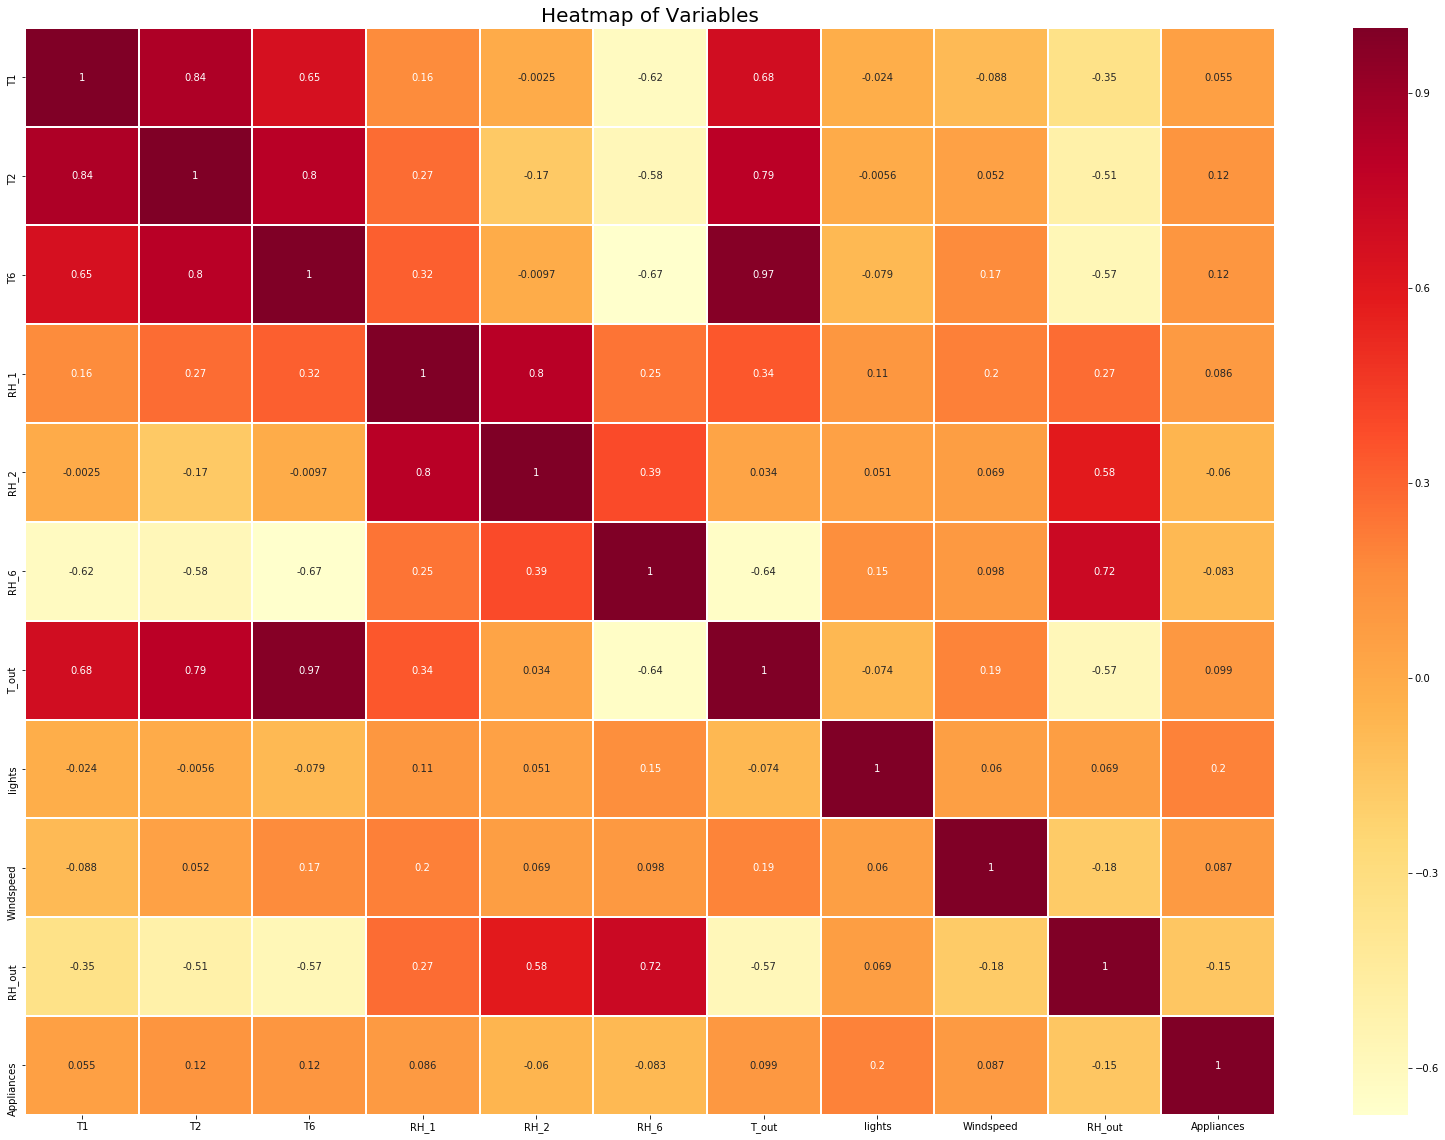

In [695]:
#Correlation:

fig = plt.figure(figsize=(28,20))

axis = sns.heatmap(df_final.corr(), cmap= 'YlOrRd', linewidth=1, linecolor='white', annot=True)
axis.set_title('Heatmap of Variables', fontsize=20)

### In our final dataframe, there is hardly any correlation between features, however there are some exceptions like 0.76 correlation between Tdewpoint and T6(which is outside tempearture) which are not related or depend on each other and have their own significance in the data so we cannot ignore or drop them.   

### Lets start with training the model and implement Gradient Descent:

### We will begin splitting the dataset (70-30 split)

In [696]:
x = df_final.drop(columns=["Appliances"], axis=1)
y = df_final['Appliances']

xTrain2, xTest2, yTrain2, yTest2 = train_test_split(x, y, test_size = 0.3, random_state = 0)

### Vectoization (Convert the dataframe to matrix)

In [697]:
xTrain_matrix2 = np.array(xTrain2)
xTest_matrix2 = np.array(xTest2)
yTrain_vector2 = np.array(yTrain2)
yTest_vector2 = np.array(yTest2)

In [698]:
xTrain2.head()

,T1,T2,T6,RH_1,RH_2,RH_6,T_out,lights,Windspeed,RH_out
3766,22.926667,22.323333,10.033333,44.560000,43.526667,67.960000,11.600000,20,9.000000,63.333333
9503,22.790000,21.000000,10.426667,31.700000,31.826667,14.700000,10.116667,10,4.833333,49.000000
10946,22.823333,21.356667,12.793333,36.230000,36.400000,20.763333,12.300000,0,9.666667,55.333333
10393,22.600000,20.790000,7.866667,39.163333,40.663333,43.766667,7.333333,20,2.000000,81.500000
15274,21.463333,19.760000,6.466667,41.360000,40.830000,23.690000,6.700000,0,6.666667,58.666667


### Showcasing above values in matrix: 

In [699]:
xTrain_matrix2

array([[22.92666667, 22.32333333, 10.03333333, ..., 20.        ,
         9.        , 63.33333333],
       [22.79      , 21.        , 10.42666667, ..., 10.        ,
         4.83333333, 49.        ],
       [22.82333333, 21.35666667, 12.79333333, ...,  0.        ,
         9.66666667, 55.33333333],
       ...,
       [21.66666667, 19.        ,  5.65666667, ...,  0.        ,
         3.        , 80.33333333],
       [21.89      , 20.79      , 15.03      , ...,  0.        ,
         6.33333333, 71.5       ],
       [20.89      , 20.6       ,  5.9       , ...,  0.        ,
         6.        , 81.33333333]])

In [700]:
xTrain_matrix2.shape

(13814, 10)

### Its the matrix of 13184 x 10

### Due to varying magnitude of features, we need to perform Feature Normalisation. The method below subtracts the mean and divides the value by standard deviation to scale the values

In [701]:
def normaliseData(X):
    scaler=preprocessing.StandardScaler().fit(X)
    Xnorm2=scaler.transform(X)
    return Xnorm2

### Normalising "xTrain_matrix2" using Standard Scaler

In [702]:
xTrain_matrix2 = normaliseData(xTrain_matrix2)
xTrain_matrix2

array([[ 0.77734779,  0.9157877 ,  0.35619039, ...,  2.04008149,
         2.02743432, -1.11443746],
       [ 0.69206154,  0.30833191,  0.42103043, ...,  0.77909954,
         0.32574857, -2.08035676],
       [ 0.71286307,  0.47205425,  0.81116969, ..., -0.48188242,
         2.29970404, -1.65355521],
       ...,
       [-0.00894979, -0.60973728, -0.36529249, ..., -0.48188242,
        -0.42299315,  0.03118775],
       [ 0.13042042,  0.21193465,  1.17987876, ..., -0.48188242,
         0.93835544, -0.5640881 ],
       [-0.49362528,  0.12471808, -0.32517958, ..., -0.48188242,
         0.80222058,  0.09857747]])

### Normalising "xTest_matrix2" using Standard Scaler

In [703]:
xTest_matrix2 = normaliseData(xTest_matrix2)
xTest_matrix2

array([[-0.30945954, -0.24619744,  0.36826999, ..., -0.47256809,
         0.3191343 , -2.50247733],
       [ 0.05603127, -0.39145471, -0.16279796, ..., -0.47256809,
        -0.02000479, -0.2972224 ],
       [ 0.42771683, -0.07698021,  0.4930357 , ..., -0.47256809,
         0.7261012 , -0.76265309],
       ...,
       [-1.07554479, -1.159671  , -0.94014258, ..., -0.47256809,
         0.59044556,  0.56714887],
       [-0.43335473, -0.07698021, -0.95587391, ..., -0.47256809,
        -0.02000479,  0.79986422],
       [ 0.01886271, -0.26117242, -0.78228683, ..., -0.47256809,
        -0.42697169, -1.32781893]])

### Initializing value for beta 0

In [704]:
XtrainNorm2 = np.hstack((np.ones((xTrain_matrix2.shape[0],1)),xTrain_matrix2))
XtestNorm2 = np.hstack((np.ones((xTest_matrix2.shape[0],1)),xTest_matrix2))

### Normalized Value

In [705]:
XtrainNorm2

array([[ 1.        ,  0.77734779,  0.9157877 , ...,  2.04008149,
         2.02743432, -1.11443746],
       [ 1.        ,  0.69206154,  0.30833191, ...,  0.77909954,
         0.32574857, -2.08035676],
       [ 1.        ,  0.71286307,  0.47205425, ..., -0.48188242,
         2.29970404, -1.65355521],
       ...,
       [ 1.        , -0.00894979, -0.60973728, ..., -0.48188242,
        -0.42299315,  0.03118775],
       [ 1.        ,  0.13042042,  0.21193465, ..., -0.48188242,
         0.93835544, -0.5640881 ],
       [ 1.        , -0.49362528,  0.12471808, ..., -0.48188242,
         0.80222058,  0.09857747]])

In [706]:
XtrainNorm2.shape

(13814, 11)

### Transforming the X values into Matrix and transposing the Y matrix for Test and Train

In [707]:
# For TRAIN:

XtrainMatrix2= np.matrix(XtrainNorm2) 
yTrain2 = np.matrix(yTrain_vector2).T

In [708]:
#For TEST:

XtestMatrix2 = np.matrix(XtestNorm2)  
yTest2 = np.matrix(yTest_vector2).T

In [709]:
yTest2.shape

(5921, 1)

### alpha = 0.01

In [733]:
alpha=0.01
iterations=20000
theta=np.zeros((XtrainMatrix2.shape[1],1)).T
theta,trainCost,testCost= gradientDescent(XtrainMatrix2,yTrain2,XtestMatrix2,yTest2,theta,alpha,iterations)
theta


Converged in  11948  iterations.


matrix([[ 96.93426958,  30.19657048, -47.24268386,  42.49916619,
          64.24038964, -54.46875789,  -6.97589781, -44.37446703,
          17.72961933,   3.54822288, -11.45188586]])

In [734]:
computeCost(XtrainMatrix2,yTrain2,theta)

4504.23821694343

In [735]:
computeCost(XtestMatrix2,yTest2,theta)

4949.996858135206

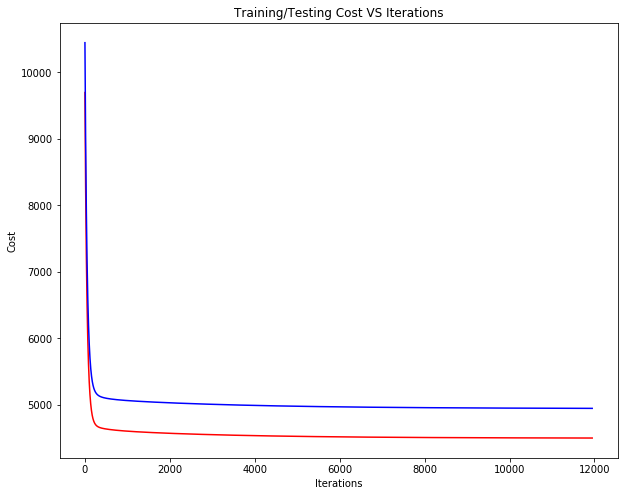

In [736]:
plotLearningCurve(trainCost,testCost)

### alpha = 0.1

In [742]:
alpha=0.1
iterations=15000
theta=np.zeros((XtrainMatrix2.shape[1],1)).T
theta,trainCost,testCost= gradientDescent(XtrainMatrix2,yTrain2,XtestMatrix2,yTest2,theta,alpha,iterations)
theta


Converged in  1935  iterations.


matrix([[ 96.93426958,  35.18680569, -54.13107006,  49.41496301,
          68.6368281 , -59.26117809,  -5.73048487, -49.79465702,
          17.55670135,   3.51176155, -11.68388393]])

In [743]:
computeCost(XtrainMatrix2,yTrain2,theta)

4501.347631396568

In [744]:
computeCost(XtestMatrix2,yTest2,theta)

4945.306549945673

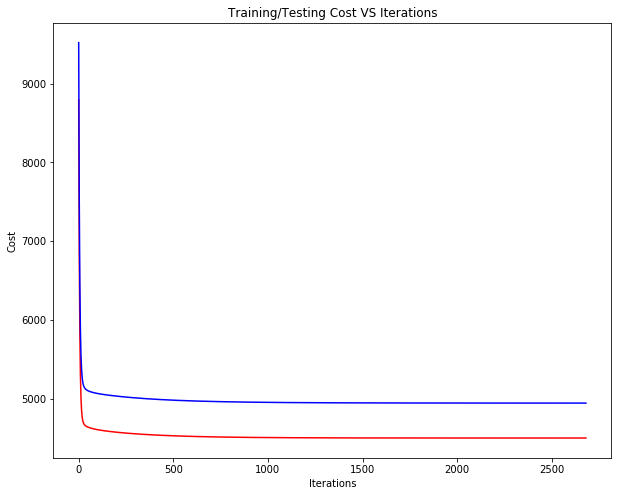

In [724]:
plotLearningCurve(trainCost,testCost)

### alpha = 0.5

In [725]:
alpha=0.5
iterations=5000
theta=np.zeros((XtrainMatrix2.shape[1],1)).T
theta,trainCost,testCost= gradientDescent(XtrainMatrix2,yTrain2,XtestMatrix2,yTest2,theta,alpha,iterations,0.0001)
theta


Converged in  3  iterations.


matrix([[90.87587773, -7.5164169 , -1.91256102, -3.21539859,  9.36388959,
         -4.65868907,  2.51307416, -7.18731213, 19.35491899,  3.82648914,
         -5.31787692]])

In [726]:
computeCost(XtrainMatrix2,yTrain2,theta)

5085.761931144749

In [727]:
computeCost(XtestMatrix2,yTest2,theta)

5539.151761045061

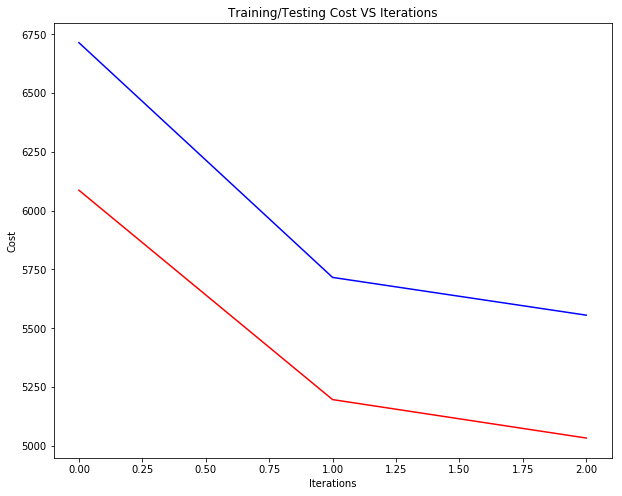

In [728]:
plotLearningCurve(trainCost,testCost)

### So basically for 10 best features I am getting the best Training Cost and Testing Cost at alpha = 0.1
 

## Detailed explanation for this behavior has been provided in the report 